# Project of Investigating the Movie Dataset

- Introduction
- Data Cleaning and Wrangling
- Exploratory Data Analysis (EDA)
- Conclusion

## Introduction
 I have selected the Movies Dataset to finish investigating a datset analysis project and personally I am fan of matching of movies so it intrigues me. The Dataset contains information about almost 11,000 movies containing 21 columns like user rating, revenues, cast, budget, revenue, etc.
 
### Questions
- What are max and min value of movies charateristics (budget, revenue, duration, profits) ?
- What is Average runtime of movies ?
- In which year most movies and profits (w.r.t. Budget and Revenue) made ?  
- What are various characteristics of profitable movies ?

To answer the above questions, I would need to analze following Characteristics of the dataset.
- Cast, production companies and genres
- Average budget and revenue earned
- Average runtime of movies

In [1]:
# importing required libraries of pandas, numpy and matplotlib
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as pyo

## Data Wrangling and Cleaning

Load and read the dataset from .csv format. Use pandas to understand the data like non-null values, duplicate values (if any). After properly understanding the data, we can proceed to cleaning the data and extracting relevant columns to draw insights for the question mentioned in the Introduction section.

In [2]:
#load the csv file
df = pd.read_csv('tmdb-movies.csv')

df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# shape of the dataset
df.shape

(10866, 21)

In [4]:
# checking for non-null value and data type of the columns in the data
df.info()

# perform operations if required to change the data type of a column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
# check for duplicates
sum(df.duplicated())

1

## Data Cleaning
- Removing unwanted columns
- Dropping duplicate rows
- When calculating profit of a company 'zero' value in budget and revenue does not make sense, so removing it to make clean analysis. 
- Changing revenue and budget to int64, so numeric calculation could be done and visulizations creating

### List of unwanted columns to drop: 
- id, imdb_id, tagline popularity, budget_adj, revenue_adj, homepage, keywords, overview, vote_count and vote_average

Why unwanted ?
- vote_count and vote_average is not same so drawing colcusion based on those would be baised towards movies with more vote count and should not be considered a valid characteristic for a good profitable movie.
- id and imdb_id would be useful when co-relating to a different dataset of movies with different characteristics but just the id standalone does not provide value to this analysis project (could be a primary or foreign key if there was dataset with more characteristics)
- Homepage, release_date, budget_adj, revenue_adj does not add value and conclusion to why a movies is profitable. To avoid, confusion release_year is a good characteristics which can show the movies made, movies profitable in a particular year. Release Date would hold value but not for this analysis, month-wise movie distribution, if movie released in a vacation or a holiday day but those conclusion would be valid but require more characteristics of the dataset. 


In [6]:
# list of unwanted columns for data exploration
del_col = [ 'id','tagline', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'vote_count', 'vote_average']

#deleting the columns from the dataset
df = df.drop(del_col, 1)

df.head(3)

# do not run this cell twice, it will have a key-error as the columns are already deleted and will not be present when one
# runs it again.

C:\Users\QXZ31RV\AppData\Local\Temp\ipykernel_16868\3985028588.py:5: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2015


### Droping duplicate rows

In [7]:
# droping the duplicate rows
df.drop_duplicates(keep ='first', inplace=True)

In [8]:
#shape after removing the duplicate row
df.shape

(10865, 10)

###  Finding zero value in column and replacing them to later drop them as those are error value in the dataset

In [9]:
# Assuming you have a DataFrame 'df' containing the data

# Count the number of zero values in 'revenue', 'budget', and 'runtime' columns
num_zeros_revenue = (df['revenue'] == 0).sum()
num_zeros_budget = (df['budget'] == 0).sum()
num_zeros_runtime = (df['runtime'] == 0).sum()

print("Number of zero values in 'revenue':", num_zeros_revenue)
print("Number of zero values in 'budget':", num_zeros_budget)
print("Number of zero values in 'runtime':", num_zeros_runtime)


Number of zero values in 'revenue': 6016
Number of zero values in 'budget': 5696
Number of zero values in 'runtime': 31


We use the mask function to replace the values in the specified columns ('budget', 'revenue' and 'runtime') with NaN where the values are equal to 0. Then, we proceed with dropping rows that have NaN values in the temp_list columns

In [10]:
temp_list = ['budget', 'revenue','runtime']

# Replace all the value from '0' to NaN in the list
df[temp_list] = df[temp_list].mask(df[temp_list] == 0, np.NaN)

# Removing all the rows which have NaN value in temp_list 
df.dropna(subset=temp_list, inplace=True)

In [11]:
# shape of the dataframe after removing NaN value rows
df.shape

(3854, 10)

### Chaning format of the budget and revenue for visualizations and mathematical operations

In [12]:
change_type = ['budget', 'revenue']

# Changing data type to 64-bit signed integers using astype function
df[change_type] = df[change_type].astype(np.int64)

print(df.dtypes)

budget                    int64
revenue                   int64
original_title           object
cast                     object
director                 object
runtime                 float64
genres                   object
production_companies     object
release_date             object
release_year              int64
dtype: object


# EDA

## Research Questions-1 : What are max and min value of movies charateristics (budget, revenue, duration, profits) ?

Writing a function: The function wil be used to calcualte budget, revenue, profits and runtime of the movies dataset.

Function, named calculate, takes a characteristic (column name) as input and calculates the maximum and minimum values for that characteristic (column value) in the DataFrame

#### Characteristic or Column Value this functino will be used to calculate are as follows:
- Budget
- Revenue
- Profits
- Runtime

In [13]:
def calculate(characteristic):
    #for maximum value
    maximum = df[characteristic].idxmax()
    max_details = pd.DataFrame(df.loc[maximum])
    
    #for minimum value
    minimum = df[characteristic].idxmin()
    min_details = pd.DataFrame(df.loc[minimum])
    
    #collecting data in one place
    info = pd.concat([max_details, min_details], axis=1)
    
    return info

In [14]:
# maximum and minmum value of budget
calculate('budget')

,2244,2618
budget,425000000,1
revenue,11087569,100
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
runtime,100.0,95.0
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance
production_companies,Boram Entertainment Inc.,Alcon Entertainment|Dinamo Entertainment
release_date,12/2/10,4/23/99
release_year,2010,1999


In [15]:
# show max and min revenue
calculate('revenue')

,1386,5067
budget,237000000,6000000
revenue,2781505847,2
original_title,Avatar,Shattered Glass
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director,James Cameron,Billy Ray
runtime,162.0,94.0
genres,Action|Adventure|Fantasy|Science Fiction,Drama|History
production_companies,Ingenious Film Partners|Twentieth Century Fox ...,Lions Gate Films|Cruise/Wagner Productions|Bau...
release_date,12/10/09,11/14/03
release_year,2009,2003


In [16]:
# Profit calculation of a movie is remainder from revenue and budget
df.insert(2,'profit',df['revenue']-df['budget'])

# show dataframe after adding a new column
df.head(2)

,budget,revenue,profit,original_title,cast,director,runtime,genres,production_companies,release_date,release_year
0,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,2015
1,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,2015


In [17]:
# show max and min profit
calculate('profit')

,1386,2244
budget,237000000,425000000
revenue,2781505847,11087569
profit,2544505847,-413912431
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
runtime,162.0,100.0
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
production_companies,Ingenious Film Partners|Twentieth Century Fox ...,Boram Entertainment Inc.
release_date,12/10/09,12/2/10


In [18]:
# show max and min runtime
calculate('runtime')

,2107,5162
budget,18000000,10
revenue,871279,5
profit,-17128721,-5
original_title,Carlos,Kid's Story
cast,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
director,Olivier Assayas,Shinichiro Watanabe
runtime,338.0,15.0
genres,Crime|Drama|Thriller|History,Science Fiction|Animation
production_companies,Egoli Tossell Film AG|Canal+|Arte France|Films...,Studio 4Â°C
release_date,5/19/10,6/2/03


### Brief Summary of using calculate function to find up the maximum and minimum value for budget, revenue, profit and runtime are as follow:

- #### Budget
    - Maximum Budget Movie: The Warrior's Way -> € 425000000
    - Minimum Budget Movie: Lost & Found      -> € 1
- #### Revenue
    - Maximum Revenue Movie: Avatar           -> € 2781505847
    - Mimimum Revenue Movie: Shattered Glass  -> € 2
- #### Profit
    - Maximum Profit Movie: Avatar            -> € 2544505847
    - Minimum Profit Movie: The Warrior's Way -> € -413912431
- #### Runtime
    - Maximum Runtime Movie: Carlos           -> 338 Minutes (Why didn't they declare it as a series- Pun intended :P)
    - Minimum Runtime Movie: Kid's Story      -> 15 Minutes
    
#### Keeping in mind the maximum budget movie is the one with minimum profit. So more budget in making a movie does not make it profitable. Profit is defined by revenue generated w.r.t. budget of the respective movie. As we see for instance in 'Avatar' movie.

## Research Questions-2: What is average runtime of movies ?

In [19]:
# defining a function to find average of a column
def avg_fun(column):
    return df[column].mean()

In [20]:
#calling avg_fun function short for average calculating function
print('The average runtime of movies is', avg_fun('runtime'), 'minutes')

The average runtime of movies is 109.22029060716139 minutes


#### Lets use some visualization to validate and verify the above obtained results

C:\Users\QXZ31RV\AppData\Local\Temp\ipykernel_16868\1101982163.py:2: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



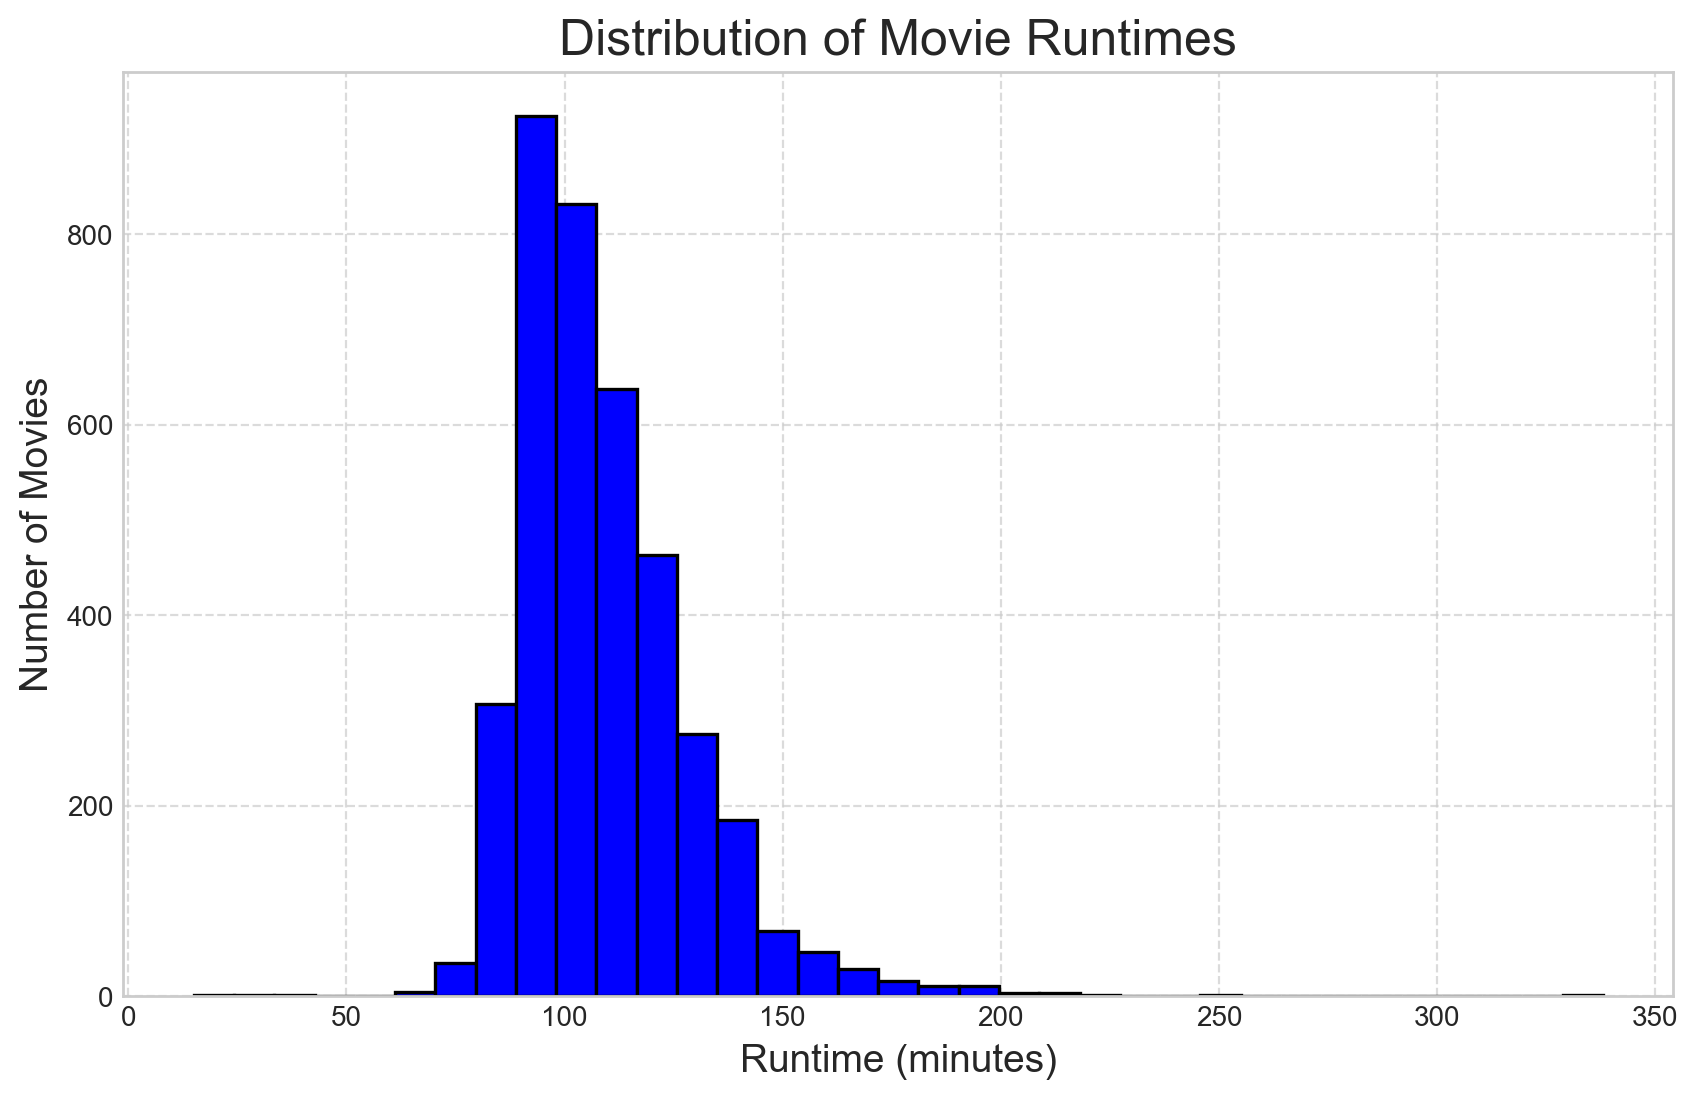

In [21]:
# Set the style for the plot (optional but can improve the appearance)
plt.style.use('seaborn-whitegrid')

# Create the histogram plot with custom figure size and colors
plt.figure(figsize=(10, 6))
plt.hist(df['runtime'], bins=35, color='blue', edgecolor='black', linewidth=1.2)

# Set the title, x-axis label, and y-axis label with fontsize
plt.title('Distribution of Movie Runtimes', fontsize=18)
plt.xlabel('Runtime (minutes)', fontsize=14)
plt.ylabel('Number of Movies', fontsize=14)

# Add gridlines to the plot
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()


In [22]:
#getting specific runtime 
df['runtime'].describe()

count    3854.000000
mean      109.220291
std        19.922820
min        15.000000
25%        95.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

#### Runtime Brief Summary

- Average runtime of a movie is 109 Minutes
- Most of the movies are in range of 80-120 Minutes
- 75% of movies have runtime less than 119 Minutes

#### Histogram of runtime of movies is positively skewed

##  Research Questions-3: In which year most movies and profits (w.r.t. Budget and Revenue) made ? 

#### Profitable Movies and Number of movies made in each year

In [23]:
movies_count_profit = df.groupby('release_year').agg({'profit': 'sum', 'original_title': 'count'})

# Rename the columns for clarity
movies_count_profit.rename(columns={'original_title': 'total_movies', 'profit': 'total_profit'}, inplace=True)

# Print the resulting DataFrame
print(movies_count_profit)

              total_profit  total_movies
release_year                            
1960             108198052             5
1961             299083188            10
1962             166879846             7
1963             115411882             6
1964             294678387             7
1965             399281854             5
1966              52468689             5
1967             636334637            13
1968             168271762             9
1969             206862989             4
1970             454070023            11
1971             336284710            13
1972             457235917             8
1973            1057686099            12
1974             650582027            13
1975             808207270             9
1976             629426536            15
1977            1743308485            19
1978            1005100089            17
1979             950330150            16
1980            1002065664            23
1981            1320251458            30
1982            

#### Lets create some plots for better understanding of number of movies released per year and the profit generated by those movie per year

#### Trying to understand how the number of movies per year affects the total profits

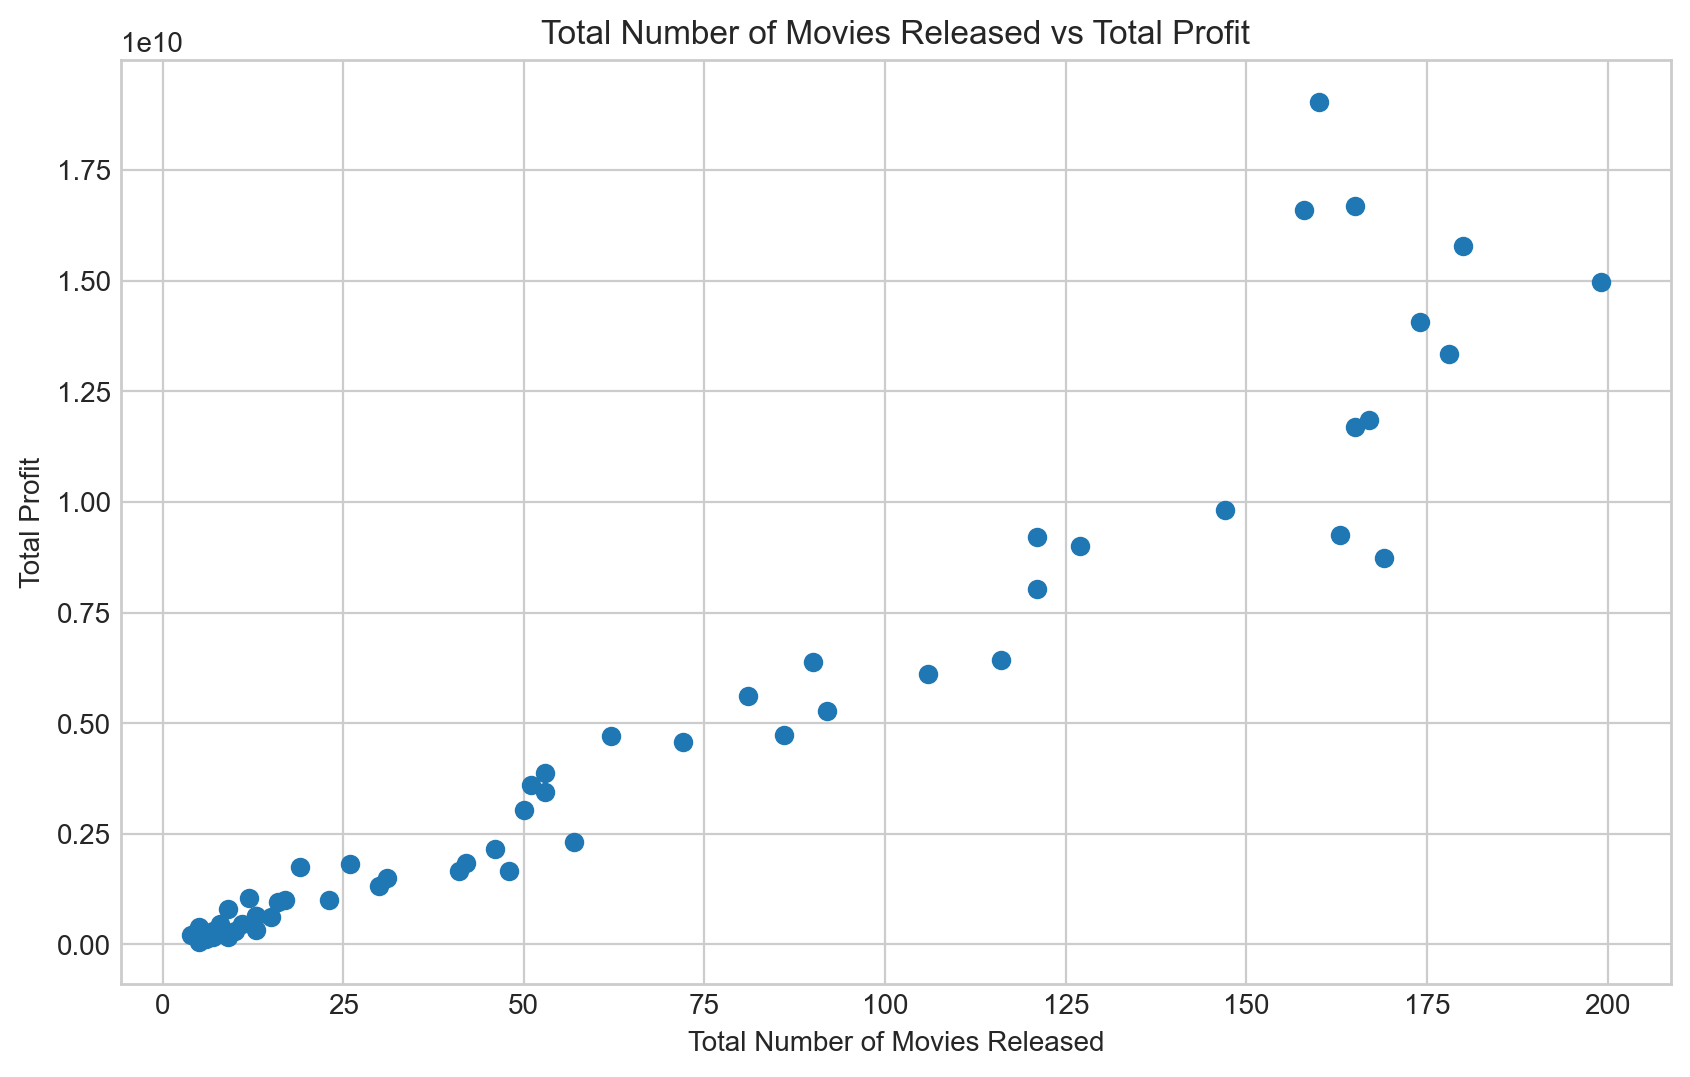

In [24]:
# Group the data by 'release_year' and calculate the counts and sums
movies_count_profit = df.groupby('release_year').agg({'profit': 'sum', 'original_title': 'count'})

# Rename the columns for clarity
movies_count_profit.rename(columns={'original_title': 'total_movies', 'profit': 'total_profit'}, inplace=True)

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(movies_count_profit['total_movies'], movies_count_profit['total_profit'])
plt.xlabel('Total Number of Movies Released')
plt.ylabel('Total Profit')
plt.title('Total Number of Movies Released vs Total Profit')
plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


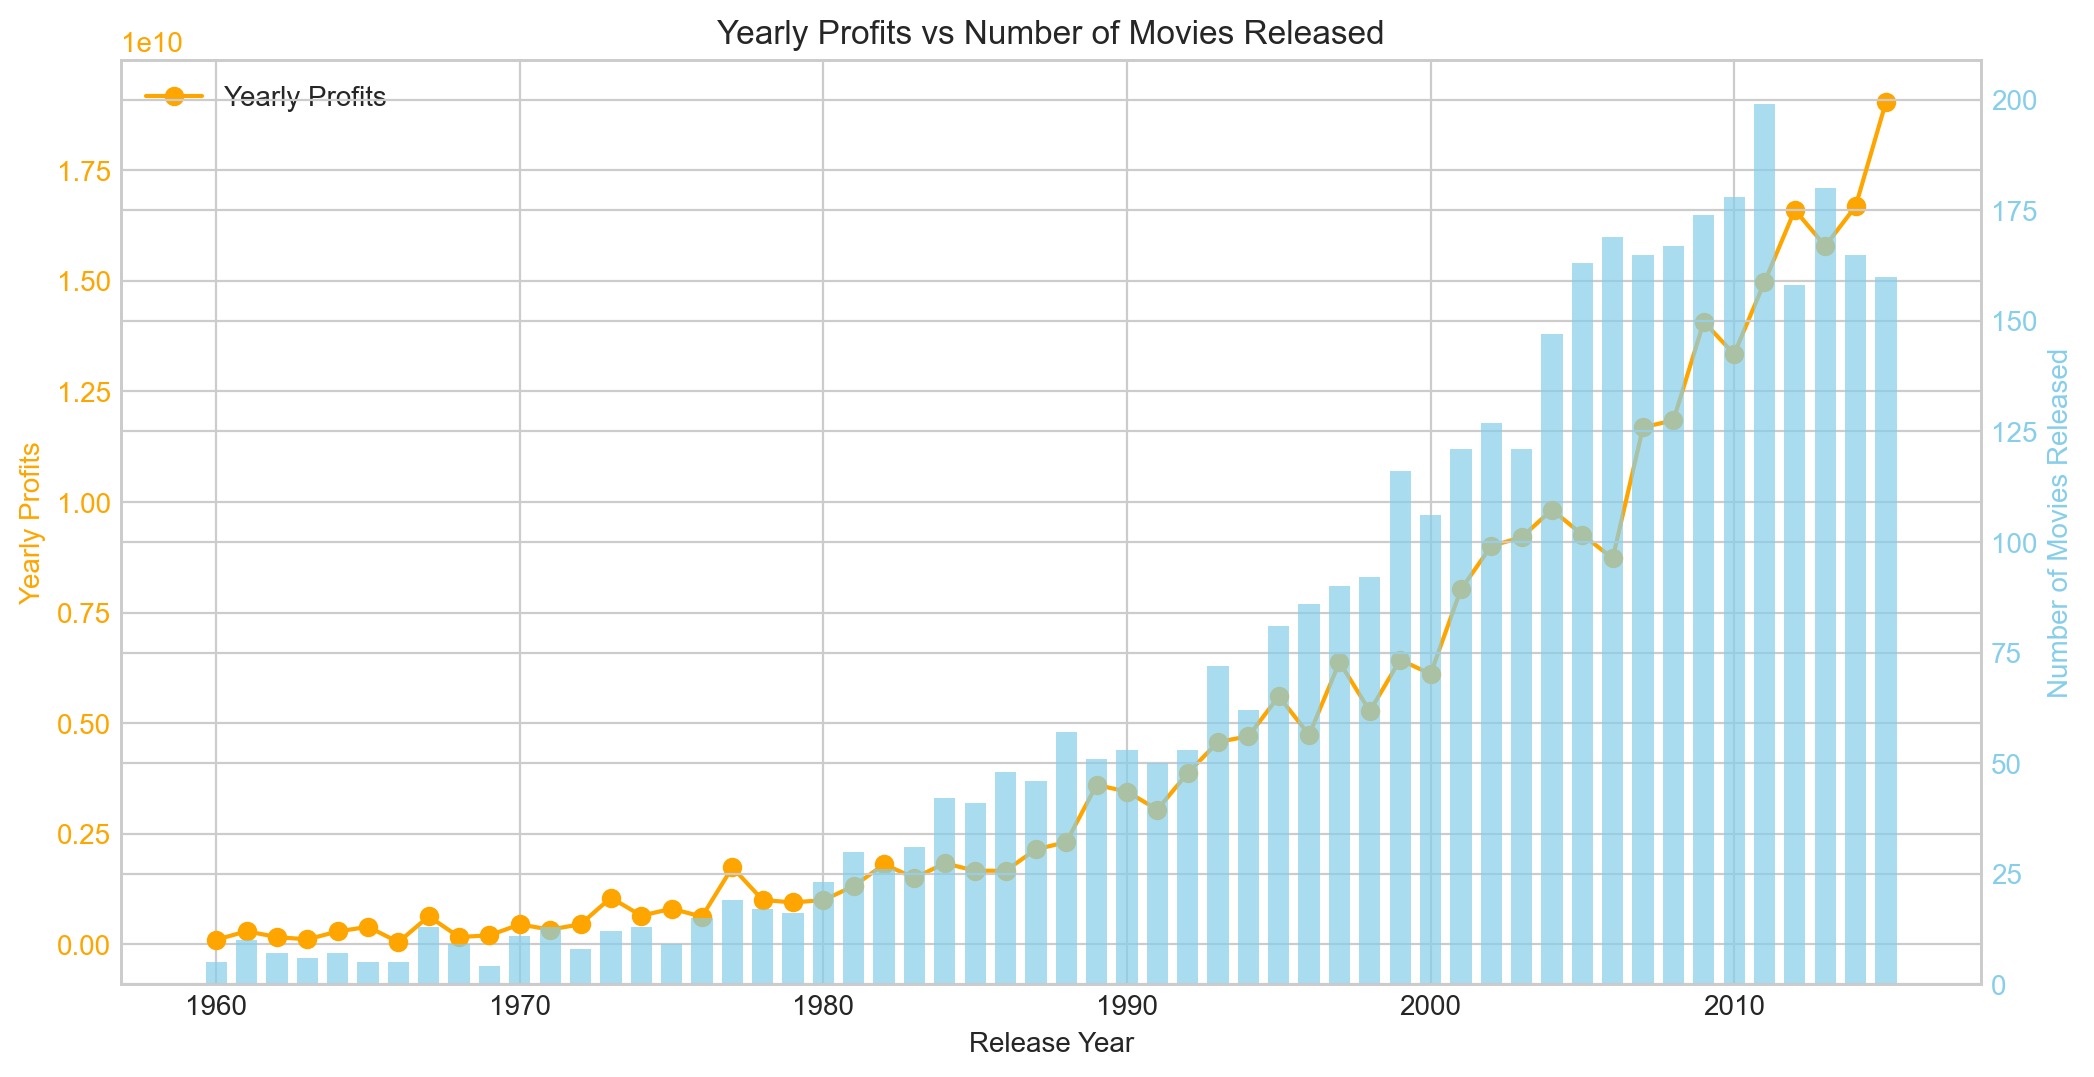

In [25]:
yearly_profits = df.groupby('release_year')['profit'].sum()

# Count the number of movies released each year
movies_released_each_year = df['release_year'].value_counts().sort_index()

# Plot the line chart of yearly profits
plt.figure(figsize=(12, 6))
ax1 = plt.gca()  # Get the current axis
ax1.plot(yearly_profits.index, yearly_profits.values, label='Yearly Profits', color='orange', marker='o')
ax1.set_xlabel('Release Year')
ax1.set_ylabel('Yearly Profits', color='orange')
ax1.tick_params(axis='y', labelcolor='orange')
ax1.grid(True)

# Create a secondary y-axis for the histogram
ax2 = ax1.twinx()  # Create a twin axis
ax2.bar(movies_released_each_year.index, movies_released_each_year.values, width=0.7, color='skyblue', alpha=0.7)
ax2.set_ylabel('Number of Movies Released', color='skyblue')
ax2.tick_params(axis='y', labelcolor='skyblue')

# Add legend for both data series
ax1.legend(loc='upper left', fontsize='medium')
ax2.legend(loc='upper right', fontsize='medium')

plt.title('Yearly Profits vs Number of Movies Released')
plt.show()

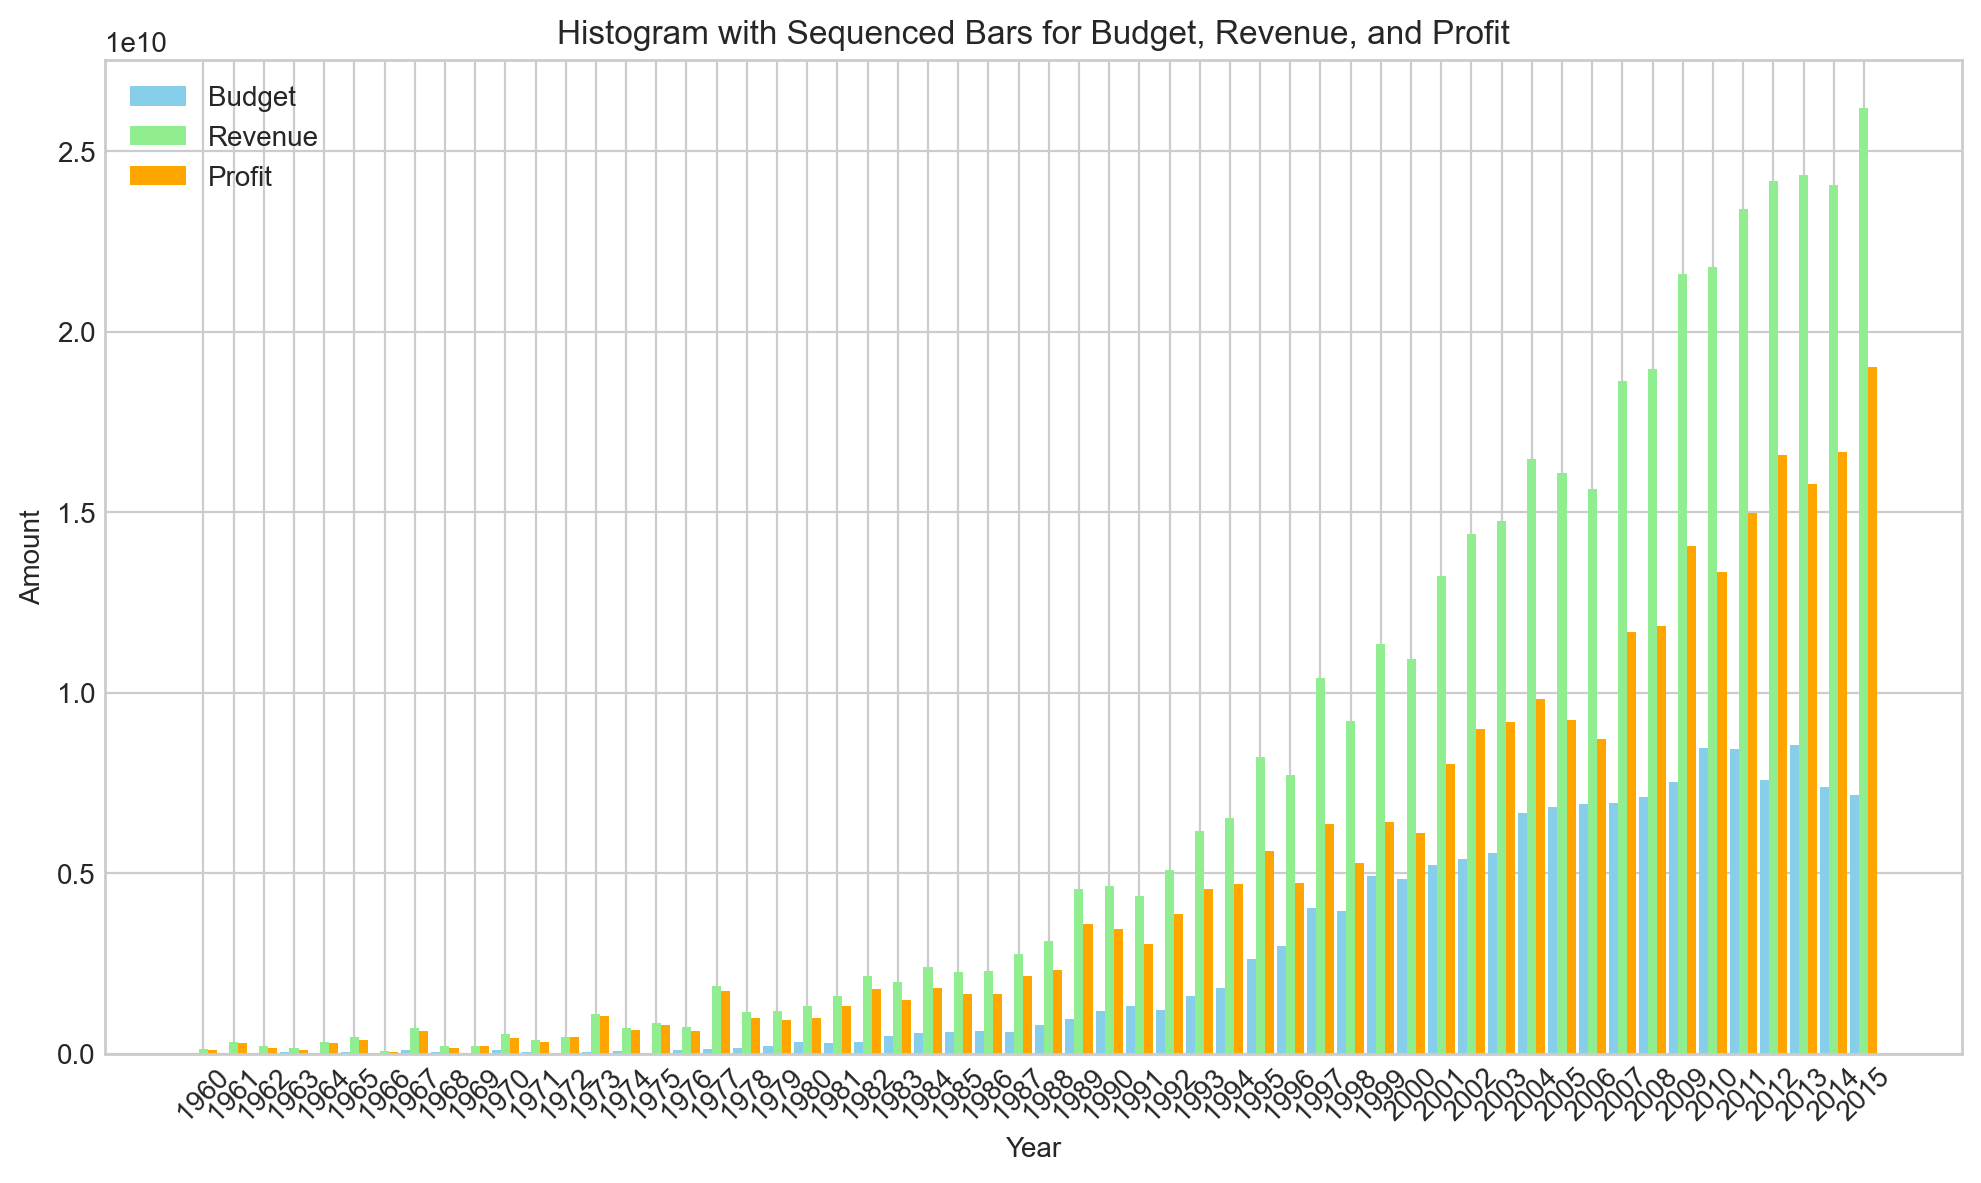

In [26]:
# Group the data by 'release_year' and calculate the total budget and revenue for each year
grouped_data = df.groupby('release_year').agg({'budget': 'sum', 'revenue': 'sum'}).reset_index()

# Calculate the difference between 'revenue' and 'budget' for each year
grouped_data['profit'] = grouped_data['revenue'] - grouped_data['budget']

# Create a figure and subplot for the histogram
plt.figure(figsize=(10, 6))

# Get the release_years for x-axis
release_years = grouped_data['release_year']

# Calculate the positions for the bars
bar_width = 0.3
bar_positions_budget = np.arange(len(release_years))
bar_positions_revenue = bar_positions_budget + bar_width
bar_positions_difference = bar_positions_revenue + bar_width

# Plot the histogram with color-coded bars
plt.bar(bar_positions_budget, grouped_data['budget'], width=bar_width, color='skyblue', label='Budget')
plt.bar(bar_positions_revenue, grouped_data['revenue'], width=bar_width, color='lightgreen', label='Revenue')
plt.bar(bar_positions_difference, grouped_data['profit'], width=bar_width, color=np.where(grouped_data['profit'] < 0, 'red', 'orange'), label='Profit')

# Set the x-axis ticks and labels
plt.xticks(bar_positions_revenue, release_years, rotation=45)
plt.xlabel('Year')
plt.ylabel('Amount')
plt.title('Histogram with Sequenced Bars for Budget, Revenue, and Profit')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [27]:
#max profit year
yearly_profits.idxmax()

2015

In [28]:
# minumum profit year
yearly_profits.idxmin()

1966

In [29]:
# max. profit in a year
movies_released_each_year.idxmax()

2011

In [30]:
# minimum profit in a year
movies_released_each_year.idxmin()

1969

### Brief Summary of statistics of profit and movies made on yearly basis

- Calculation of year wise total movies made and the profit generated
- Scatter plot of profit and number of movies made draws conclusion two points
    1. More movies made each year does not mean more profits for that year
    2. As with time the number of movies made from 1960 to 2015 have increased a lot
- Number of movies made remain mostly in a specific range till 1999 and then increased exponentially and so did the profits.
    - Most movies made in a year is 2011 but not the one which has most profits
    - 2015 is one with most profits 
- In the plot 'Histogram with Sequenced Bars for Budget, Revenue, and Profit' we can clearly see the revenue and profit making of the film industry with time. Suprising point to keep in mind even if the budget is low the revenue and profit are soraring in year 2015


#### Film Industry is making huge profits

## Research Questions-4: What are distinct characteristics or feature or traits of profitable movies ?

#### Creating a new dataframe for movies having profit of minumum €100M. So, only niche amount of movies are narrowed down.

In [31]:
#selecting the movies having profit of €25M or more
df_high_gross = df[df['profit'] >= 100000000]

#reindexing new data
df_high_gross.index = range(len(df_high_gross))

#show changed dataset
df_high_gross.head()

,budget,revenue,profit,original_title,cast,director,runtime,genres,production_companies,release_date,release_year
0,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,2015
1,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,2015
2,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2015
3,200000000,2068178225,1868178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,2015
4,190000000,1506249360,1316249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2015


In [32]:
# shape of our new dataframe
df_high_gross.shape

(826, 11)

In [33]:
print('Percentage of Movies with more than €100M is',(len(df_high_gross)/len(df))*100)


Percentage of Movies with more than €100M is 21.43227815256876


There are three columns that needs seperation to generate statistics on them.
- cast
- production_companies
- genres

To perform those seperation, lets create a function to seperate those string

In [34]:
def data(column):
    #seperate the column value by '|'
    data = df_high_gross[column].str.cat(sep = '|')
    
    data = pd.Series(data.split('|'))
    
    #arranging in descending order--> so most frequent are seen above
    count = data.value_counts(ascending = False)
    
    return count

#### Frequency of a production company, cast and genre making a profit of mroe than 100 Million euros

In [35]:
count_genres = data('genres')
count_genres.head()

Action       317
Comedy       299
Adventure    278
Drama        264
Thriller     233
dtype: int64

In [36]:
count_prod_house = data('production_companies')
count_prod_house.head()

Warner Bros.                              102
Universal Pictures                         99
Paramount Pictures                         87
Twentieth Century Fox Film Corporation     82
Walt Disney Pictures                       58
dtype: int64

In [37]:
count_cast = data('cast')
count_cast.head()

Tom Cruise      23
Tom Hanks       19
Brad Pitt       18
Adam Sandler    17
Cameron Diaz    16
dtype: int64

In [38]:
count_director = data('director')
count_director.head()

Steven Spielberg      22
Robert Zemeckis       10
Michael Bay            8
Tim Burton             7
M. Night Shyamalan     7
dtype: int64

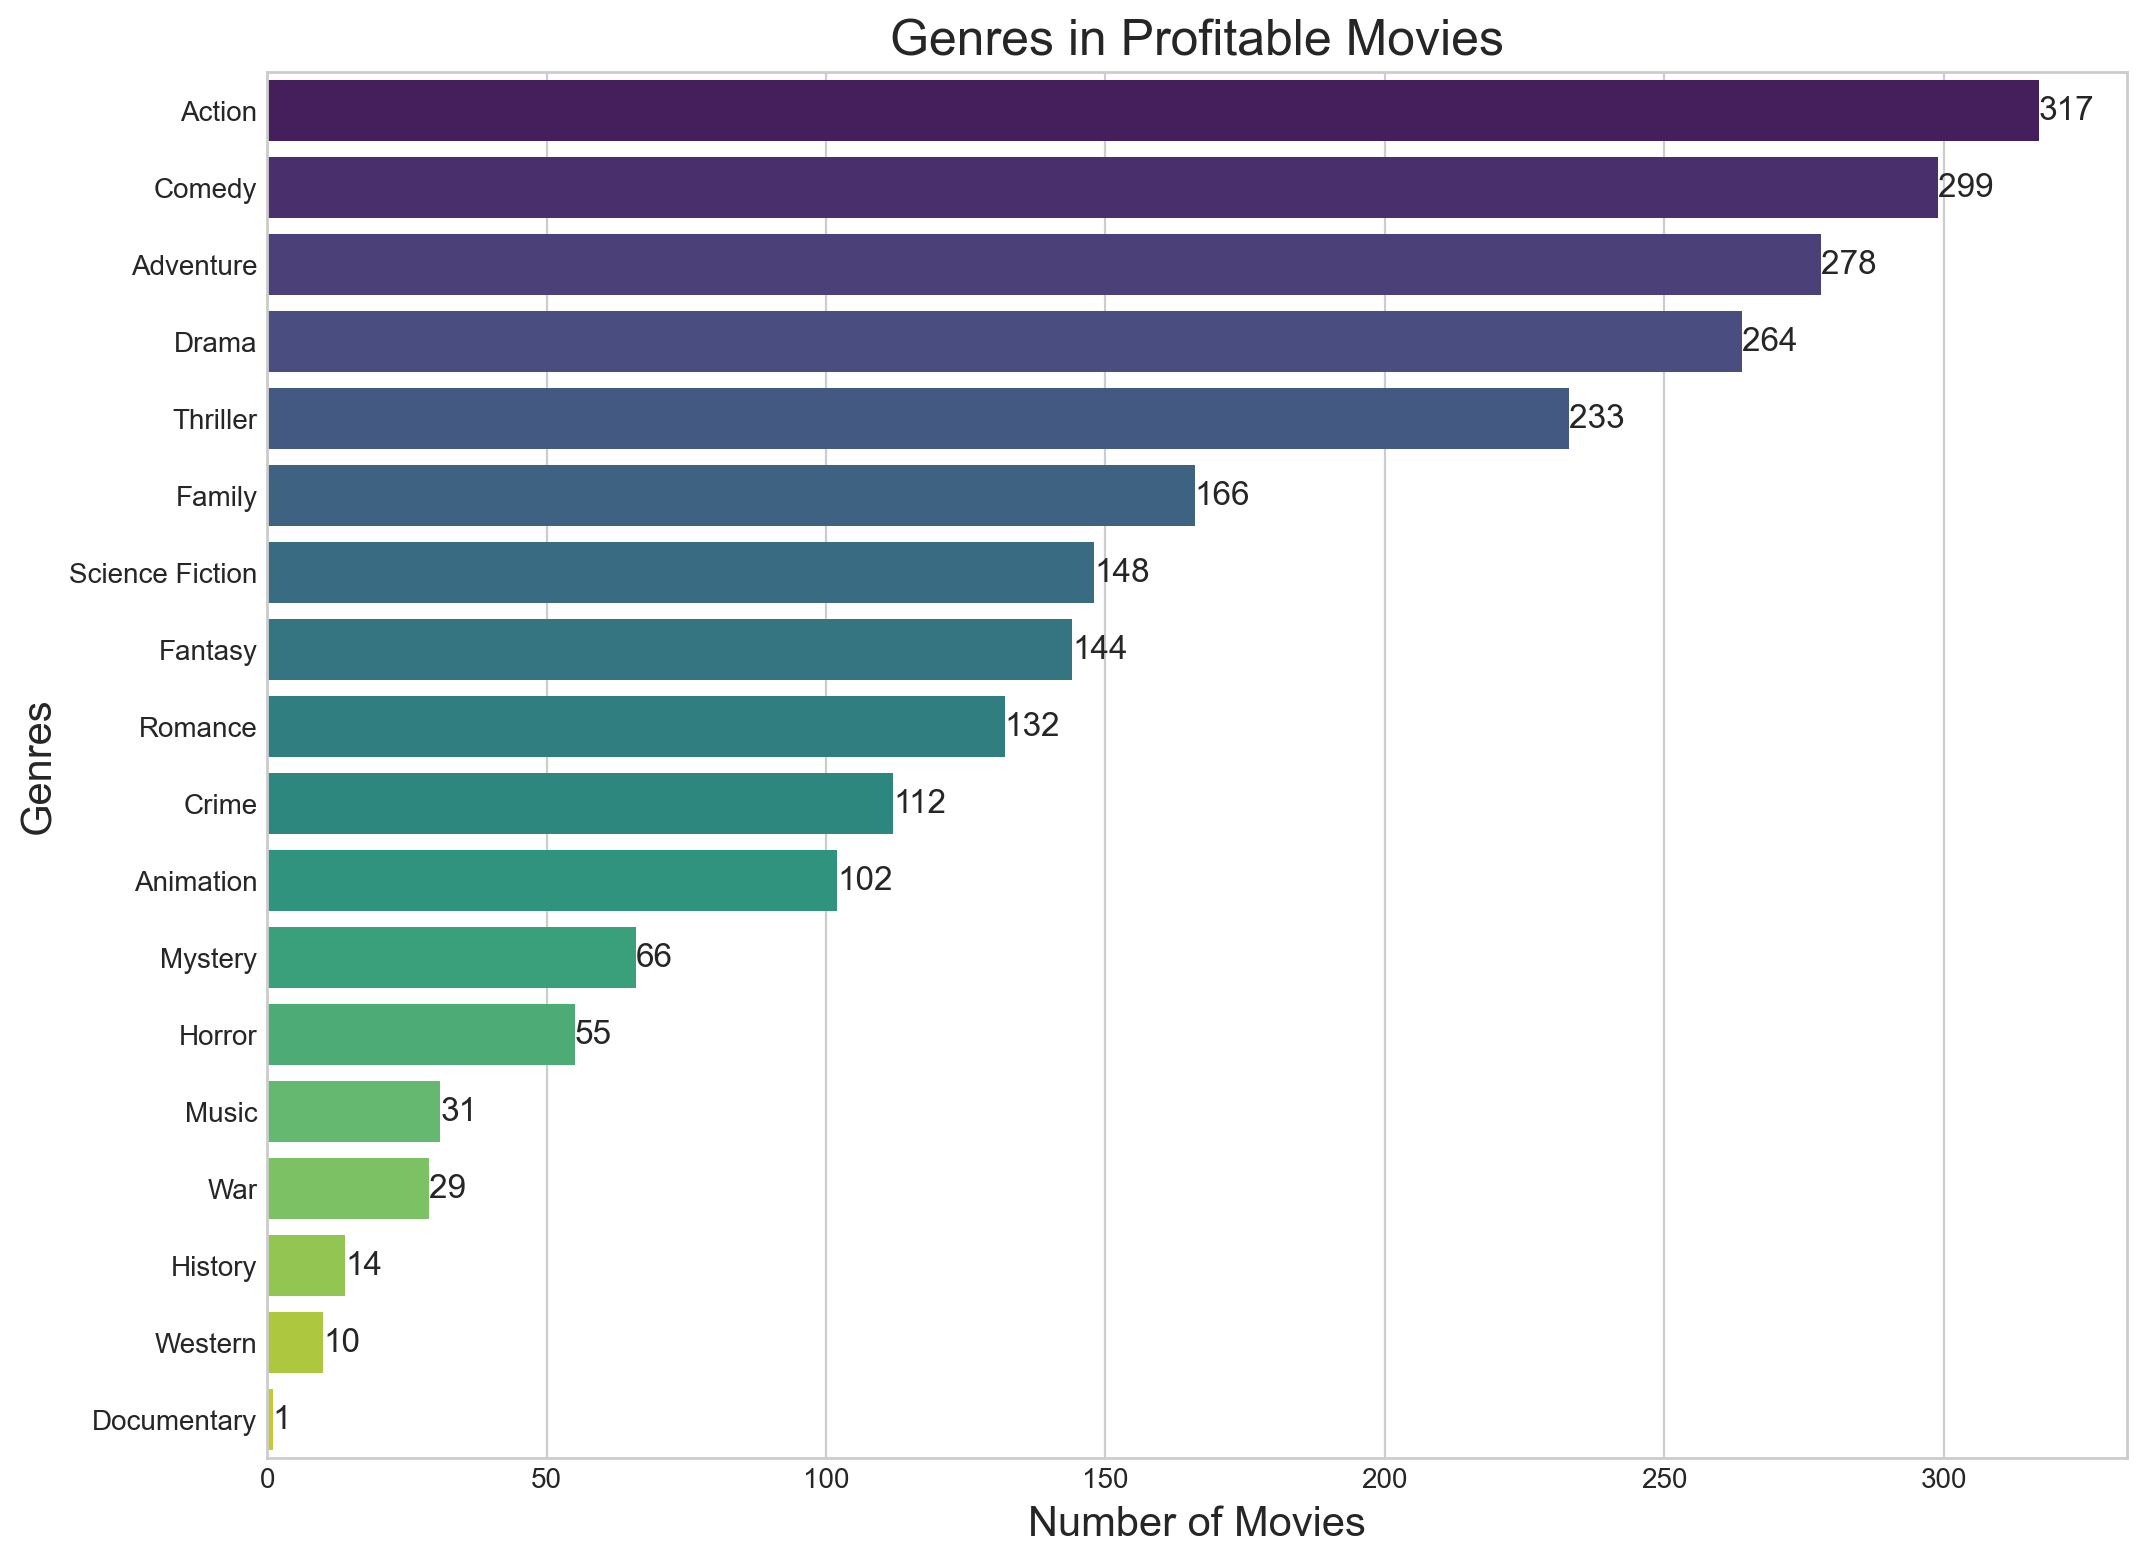

In [39]:
count_genres.sort_values(ascending=False, inplace=True)

# Plotting using Seaborn's barplot
plt.figure(figsize=(12, 9))
sns.barplot(x=count_genres.values, y=count_genres.index, palette='viridis')

# Title and labels
plt.title('Genres in Profitable Movies', fontsize=18)
plt.xlabel('Number of Movies', fontsize=15)
plt.ylabel('Genres', fontsize=15)

# Add values above the bars
for index, value in enumerate(count_genres.values):
    plt.text(value, index, f'{value}', ha='left', va='center', fontsize=12)
plt.show()

#### Personally, I am happy seeing a documentary having gross profits of more than €100M.

#### Average value of Budget, Revenue and Profit of high grossing movies

In [40]:
#Function to find average 
def highgross(column):
    return df_high_gross[column].mean()

In [41]:
# show average highworth budget
highgross('budget')

74469572.77602905

In [42]:
# show average highworth revenue
highgross('revenue')

345328046.81961256

In [43]:
# show average highworth runtime
highgross('runtime')

115.62832929782083

# Limitations

- Analysis could have some error as movie being profitable is not always based on some characteristics. Different genre and different demographic could also play a vital role in movie's success
- Validity and correctness of the data provided.
- Non-existent unit of revenue and budget.
- Missing value of budget and revenue those are removed could also make the analysis incorrect
- Recommendations for more features or characteristics to be included in dataset to make the analysis even more accurate
    - Demographic of profits being generated
    - Vote counts or reviews from audience
    - Budget segregation: Advertisement, Cast pay-rolls, sets making and audio-video making

# Conclusion

Consider a movie as a company, whose success is dependent upon many factors like who runs that company, what does that company do, what are the companies budget and revenue and how the companies treats it employees similar schematic could be consdiered when deciding which movies are most successful and earning huge profits and what are those traits.

TMDb Movie Dataset analysis focuses on many characteristics and parameters, and uses visualizations and statistical analysis tool to draw insights from the data.For a movie to gross more than 100 Million euros, there are certain traits that are observed in those movies are as follows:

1. Average Budget: Movies with average budget of 75 Million euros.
2. Average Runtime: Movies with average runtime of 115 Minutes.
3. Cast Power: For a movie to be profitable it should consists of one of the following.
    - Tom Cruise
    - Tom Hanks
    - Brad Pitt
    - Adam Sandler
    - Cameron Diaz
4. Genre: From Action to Documentary, there are movies earning a profit of €100M. Most frequent €100M are as follows:
    - Action
    - Comedy
    - Thriller
    - Drama
    - Adventure
5. Direction of movies: As much as cast, budget play roles, it's director who brings magic into the movies. Here is a list of one of most profilic directors giving huge blockbusters
    - Steven Spielberg (My Fav, Schindlers List)
    - Robert Zemeckis
    - There are more but these above two are ones with movies above 10 and grossing above €100M
6. Production Companies: Companies which provides tools to make a movies and the list of those companies may to many sound a familiar and are as follows:
    - Warner Bros.
    - Universal Pictures
    - Paramount Pictures
    - Twentieth Century Fox Film Corporation
    - Walt Disney Pictures


#### These findings provide valuable insights for filmmakers, producers, and investors looking to create profitable movies. By adhering to these identified criteria, they can enhance their chances of producing successful movies that resonate with audiences and achieve financial success in the film industry.